In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned Netflix dataset
netflix_df = pd.read_csv('../data/clean/cleaned_netflix_data_with_platform.csv')

# Load cleaned Amazon dataset
amazon_df = pd.read_csv('../data/clean/cleaned_prime_data.csv')

#remove 'Unnamed' columns from Prime only
amazon_df = amazon_df.loc[:, ~amazon_df.columns.str.contains('^Unnamed')]

In [5]:
# Load the original CSV file
df = pd.read_csv('../data/clean/combined_cleaned_data.csv', sep=',', encoding='utf-8')

# Keep only the necessary columns
columns_to_keep = ['show_id', 'type', 'title', 'release_year', 
                   'rating', 'duration_int', 'duration_type', 
                   'genres', 'platform']

df_cleaned = df[columns_to_keep]

print("Cleaned file saved successfully.")


Cleaned file saved successfully.


In [7]:
# Generate new unique 'show_id' for each platform
netflix_df['show_id'] = ['n' + str(i + 1) for i in range(len(netflix_df))] 
amazon_df['show_id'] = ['p' + str(i + 1) for i in range(len(amazon_df))]

In [9]:
# Check columns to ensure alignment
print("Netflix columns:", netflix_df.columns)
print("Amazon columns:", amazon_df.columns)
# Confirm that IDs are correctly set
print(netflix_df[['show_id']].head())
print(amazon_df[['show_id']].head())

Netflix columns: Index(['show_id', 'type', 'title', 'release_year', 'rating', 'duration',
       'listed_in', 'duration_int', 'duration_type', 'genres', 'platform'],
      dtype='object')
Amazon columns: Index(['show_id', 'type', 'title', 'release_year', 'rating', 'duration',
       'duration_int', 'duration_type', 'genres', 'platform'],
      dtype='object')
  show_id
0      n1
1      n2
2      n3
3      n4
4      n5
  show_id
0      p1
1      p2
2      p3
3      p4
4      p5


In [11]:
# Check the columns of both DataFrames
print("Netflix columns:", netflix_df.columns)
print("Amazon columns:", amazon_df.columns)


Netflix columns: Index(['show_id', 'type', 'title', 'release_year', 'rating', 'duration',
       'listed_in', 'duration_int', 'duration_type', 'genres', 'platform'],
      dtype='object')
Amazon columns: Index(['show_id', 'type', 'title', 'release_year', 'rating', 'duration',
       'duration_int', 'duration_type', 'genres', 'platform'],
      dtype='object')


In [13]:
# Check if 'listed_in' column exists before dropping
if 'listed_in' in netflix_df.columns:
    netflix_df = netflix_df.drop(columns=['listed_in'])
    
if 'listed_in' in amazon_df.columns:
    amazon_df = amazon_df.drop(columns=['listed_in'])

# Verify the columns again
print("Netflix columns:", netflix_df.columns)
print("Amazon columns:", amazon_df.columns)

# Run the assertion check again
assert list(netflix_df.columns) == list(amazon_df.columns), "Column mismatch between Netflix and Amazon datasets"


Netflix columns: Index(['show_id', 'type', 'title', 'release_year', 'rating', 'duration',
       'duration_int', 'duration_type', 'genres', 'platform'],
      dtype='object')
Amazon columns: Index(['show_id', 'type', 'title', 'release_year', 'rating', 'duration',
       'duration_int', 'duration_type', 'genres', 'platform'],
      dtype='object')


In [15]:
assert list(netflix_df.columns) == list(amazon_df.columns), "Column mismatch between Netflix and Amazon datasets"


In [17]:
# Combine datasets
combined_df = pd.concat([netflix_df, amazon_df], ignore_index=True)

In [19]:
# Quick check
print(combined_df.shape)
print(combined_df['platform'].value_counts())

(18374, 10)
platform
Prime      9668
Netflix    8706
Name: count, dtype: int64


In [21]:
# Get unique genres
unique_genres = combined_df['genres'].unique()

# Create a DataFrame for the genres table
genres_df = pd.DataFrame({
    'genre_id': range(1, len(unique_genres) + 1),
    'genre': unique_genres
})

# Preview the genres table
print(genres_df)


    genre_id                 genre
0          1       ['Documentary']
1          2     ['International']
2          3   ['Action/Thriller']
3          4             ['Drama']
4          5              ['Kids']
5          6            ['Comedy']
6          7            ['Horror']
7          8         ['"Kids TV"']
8          9           ['Reality']
9         10    ['Sci-Fi/Fantasy']
10        11          ['TV Shows']
11        12            ['Movies']
12        13             ['Other']
13        14  ['Special Interest']


In [23]:
# Get unique movies
unique_movies = combined_df['title'].unique()

# Create a DataFrame for the movies table
movies_df = pd.DataFrame({
    'title_id': range(1, len(unique_movies) + 1),
    'movie_title': unique_movies
})

# Preview the movies table
print(movies_df)

       title_id              movie_title
0             1     Dick Johnson Is Dead
1             2            Blood & Water
2             3                Ganglands
3             4    Jailbirds New Orleans
4             5             Kota Factory
...         ...                      ...
17990     17991      Pride Of The Bowery
17991     17992            Planet Patrol
17992     17993                  Outpost
17993     17994  Maradona: Blessed Dream
17994     17995              Harry Brown

[17995 rows x 2 columns]


In [25]:
# Merge to get genre_id
movie_genres_df = combined_df[['show_id', 'genres']].merge(
    genres_df,
    left_on='genres',
    right_on='genre',
    how='left'
)[['show_id', 'genre_id']]

# Preview the movie_genres table
print(movie_genres_df.head())


  show_id  genre_id
0      n1         1
1      n2         2
2      n3         3
3      n4         1
4      n5         2


In [27]:
# Export genres table
genres_df.to_csv('../data/clean/genres_table.csv', index=False)

# Export movies table
movies_df.to_csv('../data/clean/movies_table.csv', index=False)

# Export movie_genres table
movie_genres_df.to_csv('../data/clean/movie_genres_table.csv', index=False)

print("Tables exported successfully!")


Tables exported successfully!


In [29]:
### Hypothesis 1
#"How Has the Average Movie Duration Changed Over the Years?"
# Filter only Movies
movies_df = combined_df[combined_df['type'] == 'Movie']

# Check the first few rows
print(movies_df[['title', 'release_year', 'duration_int', 'platform']].head())


                               title  release_year  duration_int platform
0               Dick Johnson Is Dead          2020            90  Netflix
6   My Little Pony: A New Generation          2021            91  Netflix
7                            Sankofa          1993           125  Netflix
9                       The Starling          2021           104  Netflix
12                      Je Suis Karl          2021           127  Netflix


In [31]:
# Group by release_year and platform, then calculate the average duration
avg_duration_movies = movies_df.groupby(['release_year', 'platform'])['duration_int'].mean().reset_index()

# Preview the result
print(avg_duration_movies.head())


   release_year platform  duration_int
0          1920    Prime        72.000
1          1922    Prime       133.000
2          1923    Prime       113.000
3          1924    Prime       118.000
4          1925    Prime        81.375


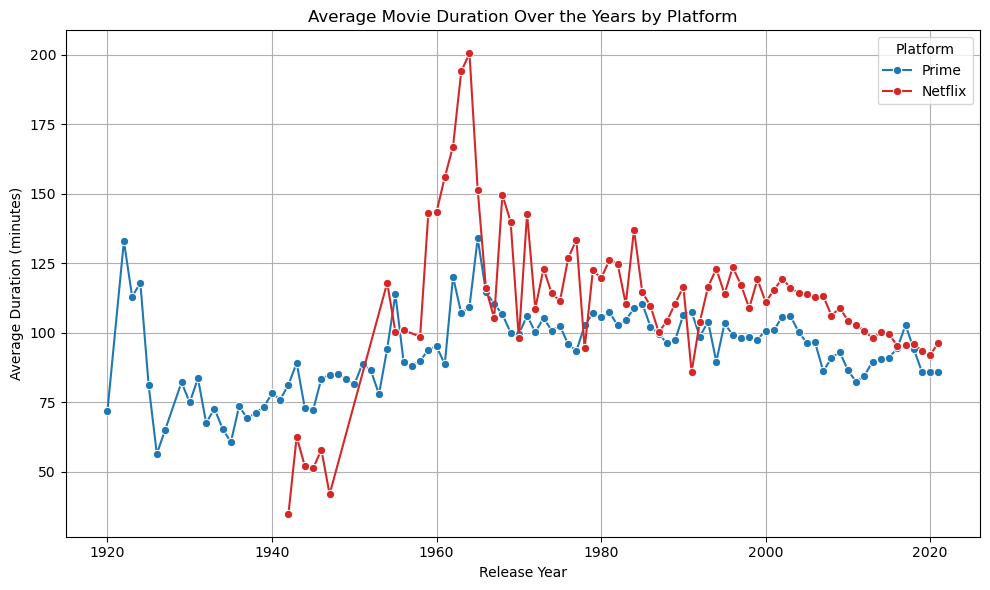

In [33]:
# Plot with specified colors
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=avg_duration_movies,
    x='release_year',
    y='duration_int',
    hue='platform',
    palette={'Prime': '#1f77b4', 'Netflix': '#d62728'},  # Blue for Prime, Red for Netflix
    marker='o'
)
plt.title('Average Movie Duration Over the Years by Platform')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.legend(title='Platform')
plt.grid(True)
plt.tight_layout()
plt.show()


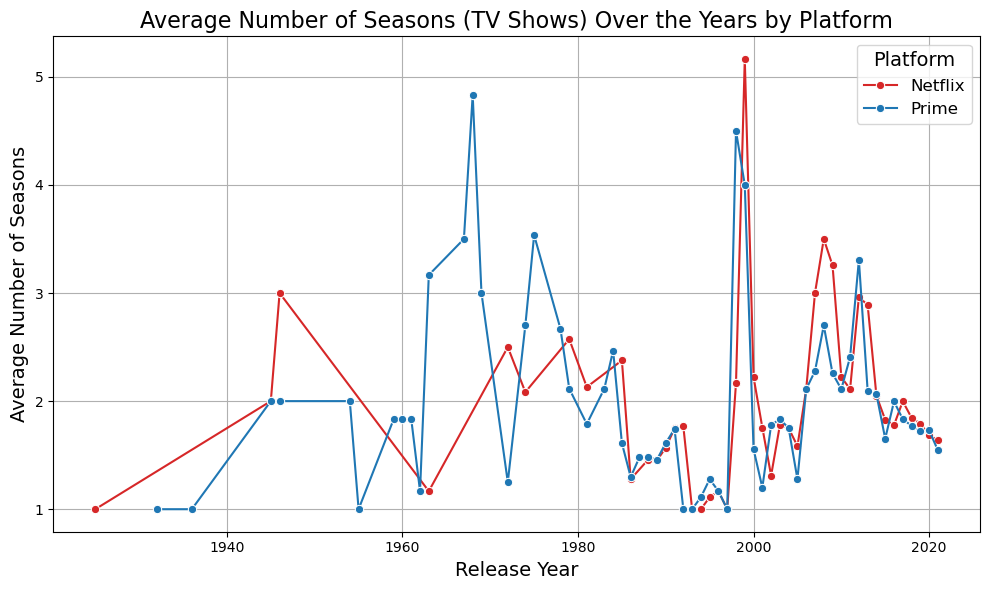

In [35]:
# Group by 'release_year' and 'platform', then calculate the mean of the number of seasons for each group
avg_seasons_tv = combined_df[combined_df['type'] == 'TV Show'].groupby(['release_year', 'platform'])['duration_int'].mean().reset_index()

# Apply smoothing (if necessary, you can use a rolling average or other smoothing methods)
avg_seasons_tv['smoothed'] = avg_seasons_tv.groupby('platform')['duration_int'].rolling(3, min_periods=1).mean().reset_index(drop=True)

# Now proceed with plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_seasons_tv, x='release_year', y='smoothed', hue='platform', palette={'Prime': '#1f77b4', 'Netflix': '#d62728'}, marker='o')

# Title and axis labels
plt.title('Average Number of Seasons (TV Shows) Over the Years by Platform', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Number of Seasons', fontsize=14)

# Customize the legend
plt.legend(title='Platform', fontsize=12, title_fontsize=14)

# Grid and layout adjustments
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()




In [37]:
## Hypothesis 2
# (Ratings Analysis): “Amazon tends to push genre boundaries with more mature-rated content, while Netflix plays it safer with family-friendly options.”

platform
Netflix    45.773030
Prime      40.194456
dtype: float64


C:\Users\PcVIP\AppData\Local\Temp\ipykernel_38632\1253059325.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


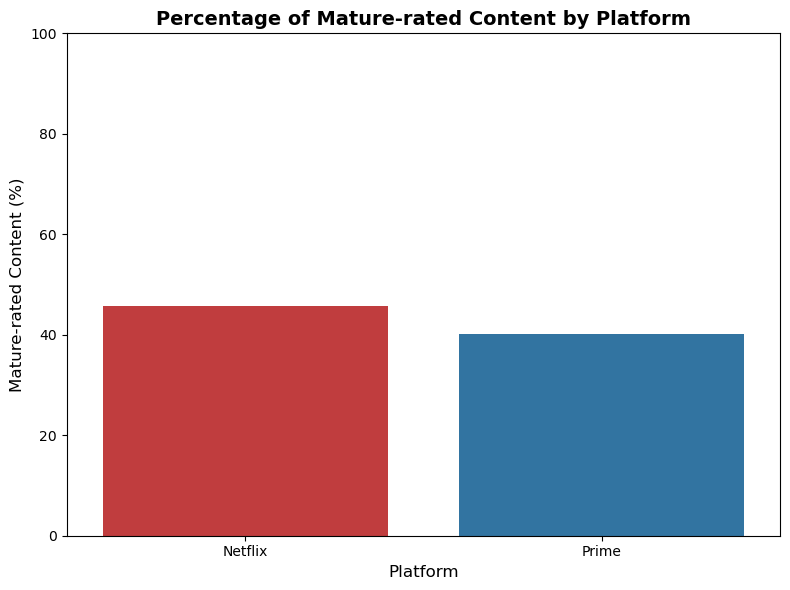

In [39]:
# Filtrar solo rating 'R' o 'TV-MA'
mature_content_df = combined_df[combined_df['rating'].isin(['R', 'TV-MA'])]

# Agrupar por plataforma y calcular el porcentaje de contenido maduro
mature_percentage = mature_content_df.groupby('platform').size() / combined_df.groupby('platform').size() * 100

# Mostrar el porcentaje de contenido maduro para cada plataforma
print(mature_percentage)

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x=mature_percentage.index,
    y=mature_percentage.values,
    palette={'Netflix': '#d62728', 'Prime': '#1f77b4'}
)

# Add title and labels
plt.title('Percentage of Mature-rated Content by Platform', fontsize=14, fontweight='bold')
plt.ylabel('Mature-rated Content (%)', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.ylim(0, 100)  # Percentage scale
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\PcVIP\AppData\Local\Temp\ipykernel_38632\4238954209.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nature_percentage_movies, x='platform', y='mature_percentage', palette={'Prime': '#1f77b4', 'Netflix': '#d62728'})


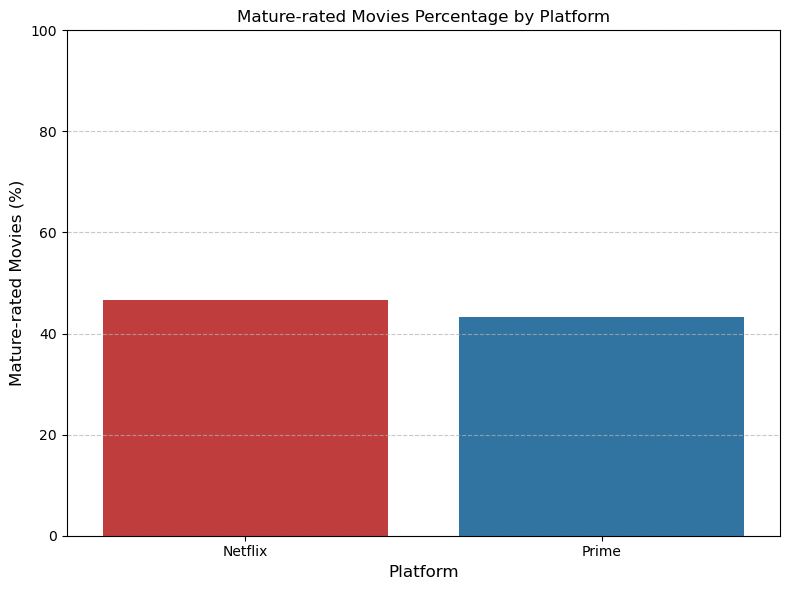

In [41]:
# Filter Movies
movies_df = combined_df[combined_df['type'] == 'Movie']

# Define the mature ratings
mature_ratings = ['R', 'TV-MA']

# Calculate the count of mature-rated movies for each platform
mature_counts_movies = movies_df[movies_df['rating'].isin(mature_ratings)].groupby('platform')['rating'].count()

# Calculate the total number of movies for each platform
total_counts_movies = movies_df['platform'].value_counts()

# Calculate the percentage of mature-rated movies for each platform
nature_percentage_movies = (mature_counts_movies / total_counts_movies) * 100

# Create a DataFrame for the percentages
nature_percentage_movies = nature_percentage_movies.reset_index()
nature_percentage_movies.columns = ['platform', 'mature_percentage']

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=nature_percentage_movies, x='platform', y='mature_percentage', palette={'Prime': '#1f77b4', 'Netflix': '#d62728'})
plt.title('Mature-rated Movies Percentage by Platform')
plt.ylabel('Mature-rated Movies (%)', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.ylim(0, 100)  # Percentage scale
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\PcVIP\AppData\Local\Temp\ipykernel_38632\1843645906.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nature_percentage_tv, x='platform', y='mature_percentage', palette={'Prime': '#1f77b4', 'Netflix': '#d62728'})


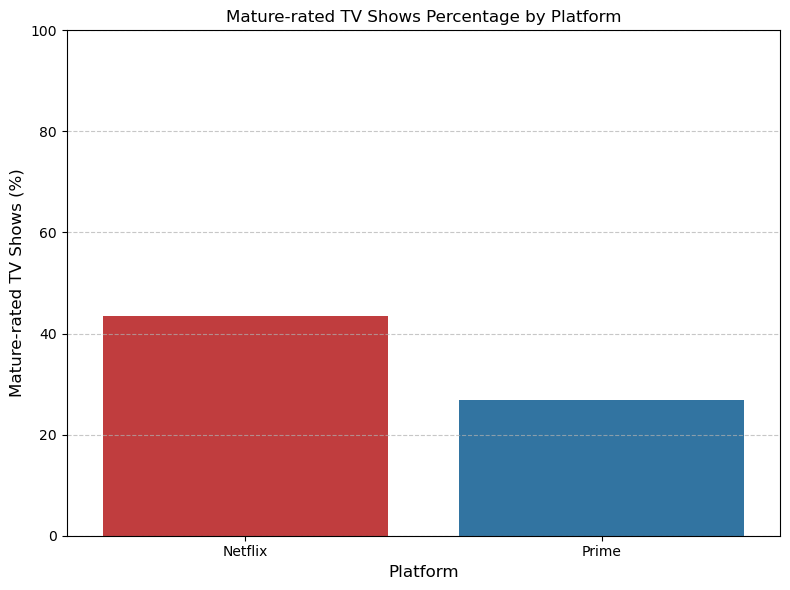

In [43]:
# Filter TV Shows
tv_df = combined_df[combined_df['type'] == 'TV Show']

# Define the mature ratings for TV Shows
mature_ratings = ['R', 'TV-MA']

# Calculate the count of mature-rated TV shows for each platform
mature_counts_tv = tv_df[tv_df['rating'].isin(mature_ratings)].groupby('platform')['rating'].count()

# Calculate the total number of TV shows for each platform
total_counts_tv = tv_df['platform'].value_counts()

# Calculate the percentage of mature-rated TV shows for each platform
nature_percentage_tv = (mature_counts_tv / total_counts_tv) * 100

# Create a DataFrame for the percentages
nature_percentage_tv = nature_percentage_tv.reset_index()
nature_percentage_tv.columns = ['platform', 'mature_percentage']

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=nature_percentage_tv, x='platform', y='mature_percentage', palette={'Prime': '#1f77b4', 'Netflix': '#d62728'})
plt.title('Mature-rated TV Shows Percentage by Platform')
plt.ylabel('Mature-rated TV Shows (%)', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.ylim(0, 100)  # Percentage scale
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [45]:
##How does the distribution of ratings compare between Netflix and Prime?

  platform rating  count  percentage
0  Netflix      G     41    0.853633
1  Netflix     PG    287    5.975432
2  Netflix  PG-13    490   10.201957
3  Netflix      R    802   16.697897
4  Netflix  TV-MA   3183   66.271081
5    Prime      G   1747   20.807527
6    Prime     PG    253    3.013340
7    Prime  PG-13   2510   29.895188
8    Prime      R   3809   45.366841
9    Prime  TV-MA     77    0.917103


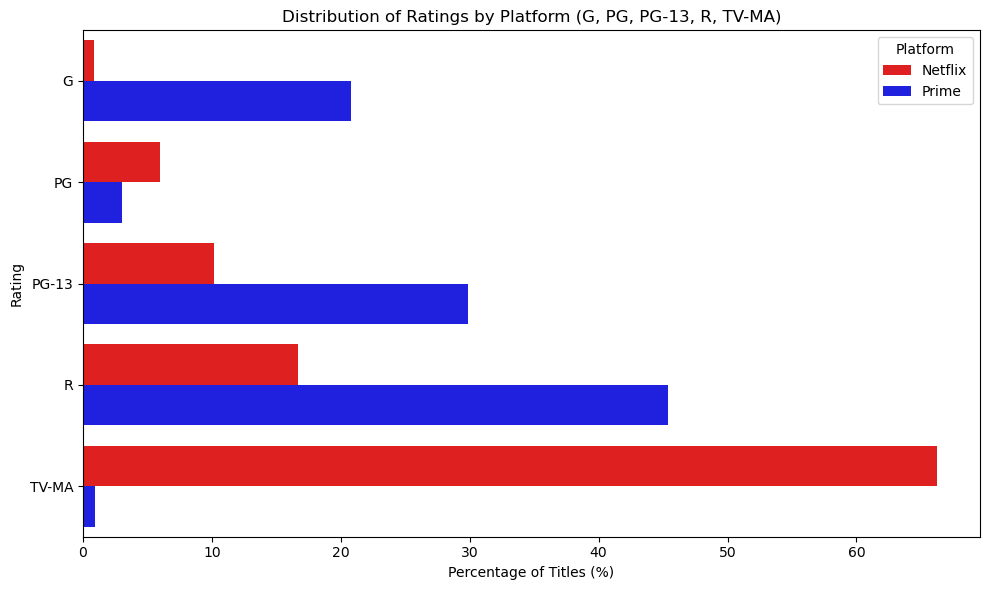

In [49]:
# Filter only the relevant ratings
filtered_df = combined_df[combined_df['rating'].isin(['G', 'PG', 'PG-13', 'R', 'TV-MA'])]

# Count by platform and rating
ratings_distribution = (
    filtered_df
    .groupby(['platform', 'rating'])
    .size()
    .reset_index(name='count')
)

# Correct calculation of percentages
ratings_distribution['percentage'] = (
    ratings_distribution
    .groupby('platform')['count']
    .transform(lambda x: (x / x.sum()) * 100)
)

# Preview the table
print(ratings_distribution)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ratings_distribution,
    x='percentage',
    y='rating',
    hue='platform',
    palette={'Netflix': 'red', 'Prime': 'blue'}
)

plt.title('Distribution of Ratings by Platform (G, PG, PG-13, R, TV-MA)')
plt.xlabel('Percentage of Titles (%)')
plt.ylabel('Rating')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


In [51]:
#export table
ratings_distribution.to_csv('../data/clean/ratings_distribution_comparison.csv', index=False)


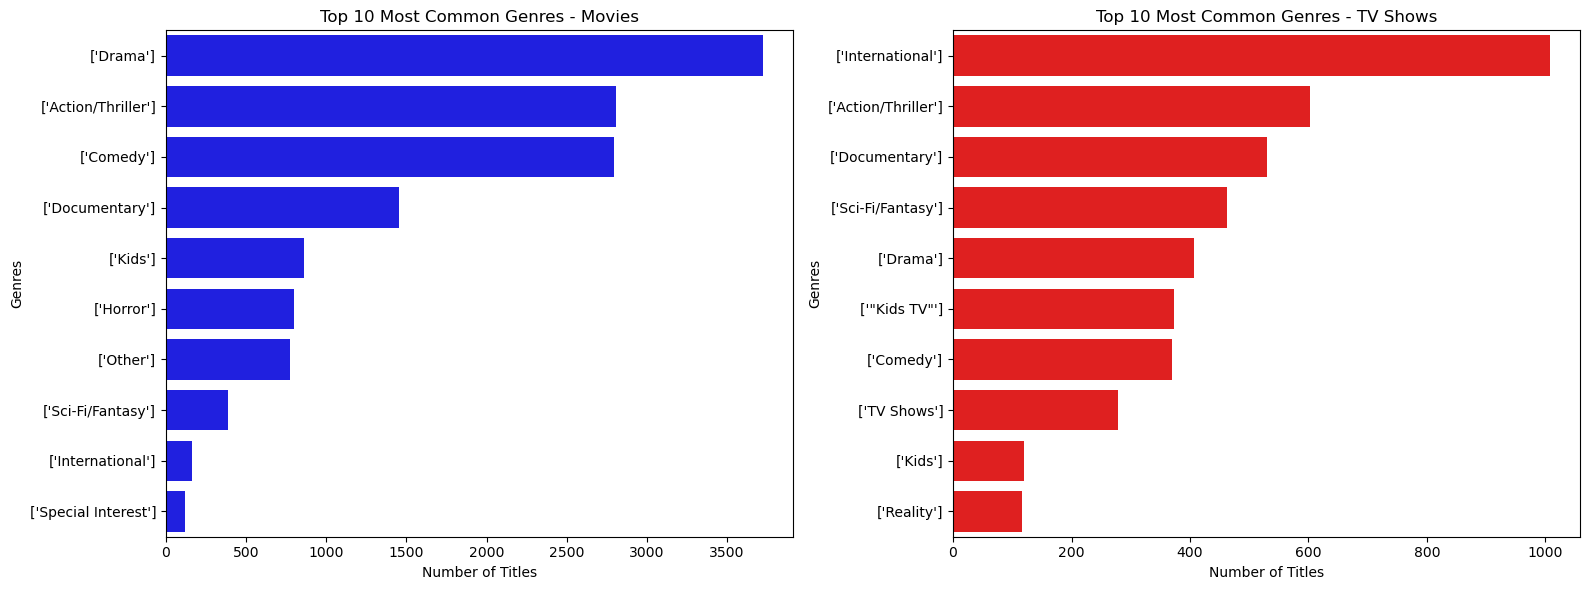

In [53]:
## Top 10 genres (Movies vs Tv-shows)
# Group and count genres for Movies and TV Shows
top_genres_movies = combined_df[combined_df['type'] == 'Movie'].groupby('genres')['show_id'].count().sort_values(ascending=False).head(10)
top_genres_tv = combined_df[combined_df['type'] == 'TV Show'].groupby('genres')['show_id'].count().sort_values(ascending=False).head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Movies
sns.barplot(
    x=top_genres_movies.values,
    y=top_genres_movies.index,
    ax=axes[0],
    color='blue'
)
axes[0].set_title('Top 10 Most Common Genres - Movies')
axes[0].set_xlabel('Number of Titles')
axes[0].set_ylabel('Genres')

# TV Shows
sns.barplot(
    x=top_genres_tv.values,
    y=top_genres_tv.index,
    ax=axes[1],
    color='red'
)
axes[1].set_title('Top 10 Most Common Genres - TV Shows')
axes[1].set_xlabel('Number of Titles')
axes[1].set_ylabel('Genres')

plt.tight_layout()
plt.show()


In [55]:
##Content by type (Movies vs Tv Shows)

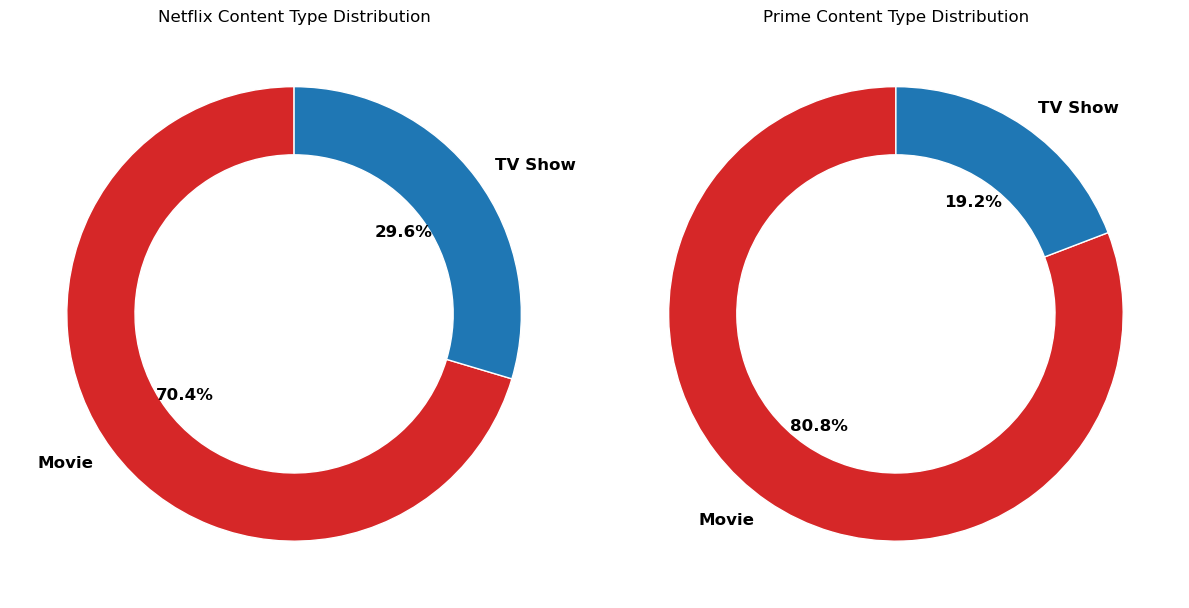

In [57]:
import matplotlib.pyplot as plt

# Calcular las proporciones para Movies vs TV Shows
platforms = combined_df['platform'].unique()

# Prepare the data
content_type_percentage = combined_df.groupby(['platform', 'type']).size().unstack(fill_value=0)
content_type_percentage = content_type_percentage.divide(content_type_percentage.sum(axis=1), axis=0) * 100

# Create separate donut plots for Netflix and Prime
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define custom colors for Netflix and Prime
colors = ['#d62728', '#1f77b4']  # Red for Netflix and Blue for Prime

for ax, platform in zip(axes, platforms):
    content_data = content_type_percentage.loc[platform]
    
    # Assign the colors based on the platform
    wedges, texts, autotexts = ax.pie(content_data, labels=content_data.index, autopct='%1.1f%%', startangle=90, 
                                      wedgeprops=dict(width=0.3, edgecolor='w'), colors=colors)
    
    ax.set_title(f'{platform} Content Type Distribution')
    
    # Format the donut chart
    for t in texts + autotexts:
        t.set_fontsize(12)
        t.set_fontweight('bold')

    ax.set(aspect="equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()





In [59]:
# Verifica si hay valores nulos
print(combined_df.isnull().sum())

# Verifica las primeras filas
print(combined_df.head())


show_id          0
type             0
title            0
release_year     0
rating           0
duration         0
duration_int     0
duration_type    0
genres           0
platform         0
dtype: int64
  show_id     type                  title  release_year rating   duration  \
0      n1    Movie   Dick Johnson Is Dead          2020  PG-13     90 min   
1      n2  TV Show          Blood & Water          2021  TV-MA  2 Seasons   
2      n3  TV Show              Ganglands          2021  TV-MA   1 Season   
3      n4  TV Show  Jailbirds New Orleans          2021  TV-MA   1 Season   
4      n5  TV Show           Kota Factory          2021  TV-MA  2 Seasons   

   duration_int duration_type               genres platform  
0            90           min      ['Documentary']  Netflix  
1             2        season    ['International']  Netflix  
2             1        season  ['Action/Thriller']  Netflix  
3             1        season      ['Documentary']  Netflix  
4             2        s

In [62]:
# Save the combined DataFrame as a CSV file
combined_df.to_csv('../data/clean/combined_final.csv', index=False)
print("Combined data saved as combined_final.csv successfully.")


Combined data saved as combined_final.csv successfully.
